In [1]:
import pandas as pd
from matplotlib import pyplot
import seaborn as sns
from pandas.plotting import scatter_matrix
import math
import seaborn as sns
import numpy as np

In [2]:
def average_calculator(a,b):
    if a == 0 or b == 0:
        return 0
    else:
        b_a = abs((a-b)/b)/100
        a_b = abs((b-a)/a)
        return (b_a,a_b)

First will be your notebook jupyter with your calculation You will have to implement multiple functions:

In [21]:
#load_dataset()

def load_dataset(dataset):
    dataset = pd.read_csv("googleplaystore.csv",index_col=None,names=["App","Category","Rating","Reviews","Size","Installs","Type","Price","Content_Rating","Genres","Last_Updated","Current_Version","Android_Version"])
    return dataset

source = "googleplaystore.csv"
raw_dataset = load_dataset(source)
raw_dataset.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Version,Android_Version
0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
3,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
4,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up


In [18]:
#Unique values per column
def unique_values(df):
    print(f"Unique Categories: {df['Category'].unique()}")
    print(f"Unique Types: {df['Type'].unique()}")
    print(f"Unique Comment Ratings: {df['Content_Rating'].unique()}")
    print(f"Unique Genres: {df['Genres'].unique()}")

unique_values(raw_dataset)

Unique Categories: ['Category' 'ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY'
 'BOOKS_AND_REFERENCE' 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING'
 'EDUCATION' 'ENTERTAINMENT' 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK'
 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME' 'LIBRARIES_AND_DEMO' 'LIFESTYLE'
 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL' 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS'
 'TRAVEL_AND_LOCAL' 'TOOLS' 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING'
 'WEATHER' 'VIDEO_PLAYERS' 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION'
 '1.9']
Unique Types: ['Type' 'Free' 'Paid' nan '0']
Unique Comment Ratings: ['Content Rating' 'Everyone' 'Teen' 'Everyone 10+' 'Mature 17+'
 'Adults only 18+' 'Unrated' nan]
Unique Genres: ['Genres' 'Art & Design' 'Art & Design;Pretend Play'
 'Art & Design;Creativity' 'Art & Design;Action & Adventure'
 'Auto & Vehicles' 'Beauty' 'Books & Reference' 'Business' 'Comics'
 'Comics;Creativity' 'Communication' 'Dating' 'Education;Education'
 'Education' 'Education;Creativity' 'Education;Music & Video'
 'E

Analysis

In [4]:
#print_summarize_dataset
def print_summarize_dataset(dataset):
    print(f"Describe Dataset:\n {dataset.describe()}\n")
    print(f"Dataset Information:\n {dataset.info()}\n")
    print(f"Dataset Count distinct:\n {dataset.nunique()}\n")

print_summarize_dataset(raw_dataset)

Describe Dataset:
             Rating
count  9367.000000
mean      4.193338
std       0.537431
min       1.000000
25%       4.000000
50%       4.300000
75%       4.500000
max      19.000000

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), objec

In [5]:
#clean the dataset for assessment: corelations - leaving only int in the dataframe
#keep: Rating, Reviews, Size, Installs, Price
#clean_dataset

def clean_dataset(dataset):
    #dataset_clean = dataset.loc[:,('Rating','Reviews','Size','Installs','Price')]
    dataset_clean = dataset
    dataset_clean['Size'] = dataset_clean['Size'].replace({'\D+':'0'},regex=True)
    dataset_clean['Installs'] = dataset_clean['Installs'].replace({'\D+':'0'},regex=True)
    dataset_clean['Reviews'] = dataset_clean['Reviews'].replace({'\D+':'0'},regex=True)
    dataset_clean['Price'] = dataset_clean['Price'].replace({'\D+':'0'},regex=True)
    dataset_clean = dataset_clean.astype({'Reviews':'int','Size':'int','Installs':'int64','Price':'int'})
    dataset_clean['Installs'] = dataset_clean['Installs']
    dataset_clean = dataset_clean.query("Price > 0")
    dataset_clean = dataset_clean.drop_duplicates(subset=['App'])
    print(dataset_clean.dtypes)
    return dataset_clean

dataset_clean = clean_dataset(raw_dataset)

App                object
Category           object
Rating            float64
Reviews             int32
Size                int32
Installs            int64
Type               object
Price               int32
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object


In [6]:
#sum total market size, by price, 
def size_of_market(dataset_clean):
    print(f"Total market asset value: {(dataset_clean['Price'].sum()/1_000_000):0.2f} mn $")
    print(f"Total market sales value (quad): {(dataset_clean['Price'].sum()*dataset_clean['Installs'].sum()/1_000_000_000_000_000):0.2f} quad $")
    print(f"Total number of installs: {(dataset_clean['Installs'].sum()/1_000_000):0.2f}")
    dataset_clean_fam = dataset_clean.query("Category == 'FAMILY'")
    print(f"Family category asset value: {(dataset_clean_fam['Price'].sum()/1_000_000):0.2f} mn $")
    print(f"Family category sales value (quad): {(dataset_clean_fam['Price'].sum()*dataset_clean_fam['Installs'].sum()/1_000_000_000_000_000):0.2f} quad $")
    print(f"Family category of installs: {(dataset_clean_fam['Installs'].sum()/1_000_000):0.2f}")


size_of_market(dataset_clean)

Total market asset value: 10.02 mn $
Total market sales value (quad): 417.96 quad $
Total number of installs: 41733.62
Family category asset value: 2.25 mn $
Family category sales value (quad): 35.03 quad $
Family category of installs: 15564.46


In [7]:
def print_summarize_dataset(dataset_clean):
    print(dataset_clean.describe())

print_summarize_dataset(dataset_clean)

           Rating       Reviews          Size      Installs          Price
count  604.000000  7.560000e+02    756.000000  7.560000e+02     756.000000
mean     4.259603  8.724888e+03   1982.222222  5.520320e+07   13247.371693
std      0.559961  8.988612e+04   2560.911537  5.370178e+08   58738.924913
min      1.000000  0.000000e+00      0.000000  0.000000e+00      99.000000
25%      4.100000  6.000000e+00    210.000000  1.000000e+03    1049.000000
50%      4.400000  8.800000e+01    660.000000  1.000000e+05    2099.000000
75%      4.600000  1.213750e+03   3040.000000  1.000000e+06    4099.000000
max      5.000000  2.376564e+06  10200.000000  1.000000e+10  400000.000000


Find the weighted rating for the apps:
rev_weight = sum(reviews)/100


In [8]:
#calculating a ratings & review index using the bayesian-average

def bayesian_avg(dataset_clean):
    tot_weight = sum(dataset_clean['Reviews'])/100
    dataset_clean['rev_weight'] = dataset_clean['Reviews']/tot_weight
    dataset_clean['weighted_rate'] = dataset_clean['rev_weight']*dataset_clean['Rating']
    return dataset_clean.sort_values(['weighted_rate'],ascending=False)

rate_rev_dataset = bayesian_avg(dataset_clean)
rate_rev_dataset.head(5)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,rev_weight,weighted_rate
2241,Minecraft,FAMILY,4.5,2376564,0,10000000000,Paid,6099,Everyone 10+,Arcade;Action & Adventure,"July 24, 2018",1.5.2.1,Varies with device,36.030300,162.136351
4034,Hitman Sniper,GAME,4.6,408292,290,10000000000,Paid,99,Mature 17+,Action,"July 12, 2018",1.7.110758,4.1 and up,6.189980,28.473907
7417,Grand Theft Auto: San Andreas,GAME,4.4,348962,260,1000000000,Paid,6099,Mature 17+,Action,"March 21, 2015",1.08,3.0 and up,5.290497,23.278188
9678,Where's My Water?,FAMILY,4.7,188740,690,1000000000,Paid,1099,Everyone,Puzzle;Brain Games,"July 5, 2018",1.16.0,4.2 and up,2.861425,13.448696
8860,Bloons TD 5,FAMILY,4.6,190086,940,1000000000,Paid,2099,Everyone,Strategy,"July 13, 2018",3.16,2.3.3 and up,2.881831,13.256422


In [9]:
#Calculate averages: installs / reviews; 
def average_inst_rev(dataset_clean_n):
    #dataset_clean['Reviews'] = dataset_clean['Reviews'] + 1
    #dataset_clean_n['Reviews'] = a
    #dataset_clean_n['Installs'] = b
    temp_dataset = dataset_clean_n
    dataset_clean_n = temp_dataset.dropna()
    dataset_clean['inst_rev'] = abs((dataset_clean_n['Reviews']-dataset_clean_n['Installs'])/dataset_clean_n['Installs'])/100
    dataset_clean['rev_inst'] = abs((dataset_clean_n['Installs']-dataset_clean_n['Reviews'])/dataset_clean_n['Reviews'])
    dataset_clean['users_engaged'] = 1-dataset_clean['rev_inst']
    #print(dataset_clean.dtypes)
    return dataset_clean

inst_rev_dataset = average_inst_rev(rate_rev_dataset)
inst_rev_dataset.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,rev_weight,weighted_rate,inst_rev,rev_inst,users_engaged
234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6080,10000000,Paid,4099,Everyone,Business,"March 25, 2018",1.5.2,4.0 and up,0.173468,0.815301,0.009989,872.973082,-871.973082
235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,390,10000000,Paid,4099,Everyone,Business,"April 11, 2017",3.4.6,3.0 and up,0.156079,0.749180,0.009990,970.345313,-969.345313
427,Puffin Browser Pro,COMMUNICATION,4.0,18247,0,10000000,Paid,3099,Everyone,Communication,"July 5, 2018",7.5.3.20547,4.1 and up,0.276637,1.106547,0.009982,547.035293,-546.035293
476,"Moco+ - Chat, Meet People",DATING,4.2,1545,0,1000000,Paid,3099,Mature 17+,Dating,"June 19, 2018",2.6.139,4.1 and up,0.023423,0.098378,0.009985,646.249191,-645.249191
477,Calculator,DATING,2.6,57,6020,100000,Paid,6099,Everyone,Dating,"October 25, 2017",1.1.6,4.0 and up,0.000864,0.002247,0.009994,1753.385965,-1752.385965


In [10]:
#Installs / price incdex
def average_inst_pric(dataset_clean_m):
    dataset_clean['inst_pric'] = abs((dataset_clean_m['Price']-dataset_clean_m['Installs'])/dataset_clean_m['Installs'])/100
    dataset_clean['pric_inst'] = abs((dataset_clean_m['Installs']-dataset_clean_m['Price'])/dataset_clean_m['Price'])
    dataset_clean['value'] = 1-dataset_clean['pric_inst']
    dataset_clean['inst_pric'].apply(fix_zeroes)
    dataset_clean['pric_inst'].apply(fix_zeroes)
    dataset_clean['value'].apply(fix_zeroes)
    return dataset_clean


price_rev_dataset = average_inst_pric(inst_rev_dataset)
price_rev_dataset.head(5)

NameError: name 'fix_zeroes' is not defined

ValueError: supplied range of [0.00099, inf] is not finite

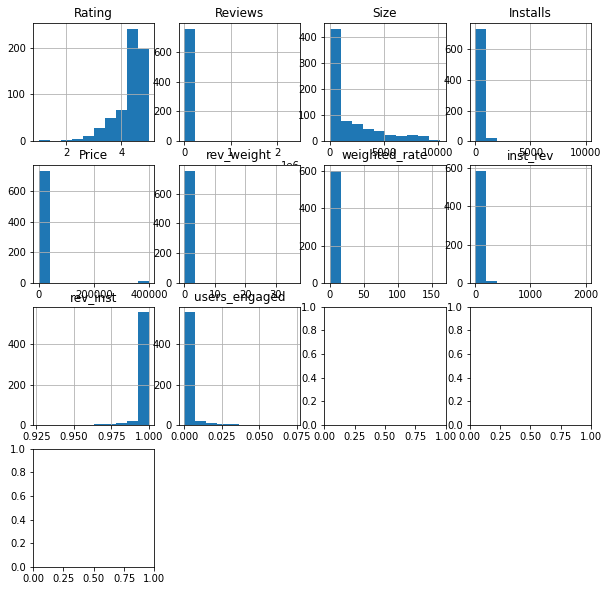

In [ ]:
def print_histograms(dataset_clean):
    dataset_clean.hist(figsize=[10,10])
    pyplot.show()

print_histograms(dataset_clean)

{'Rating': 0.045177874185773695, 'Reviews': 0.9903730729432967, 'Size': -0.0628138195862152, 'Installs': 1.0, 'Price': -0.01534488058571717, 'rev_weight': 0.9903730729432974, 'weighted_rate': 0.9902965498760059, 'inst_rev': -0.05010773403947239, 'rev_inst': -0.11417397536899687, 'users_engaged': 0.11417397536899684}


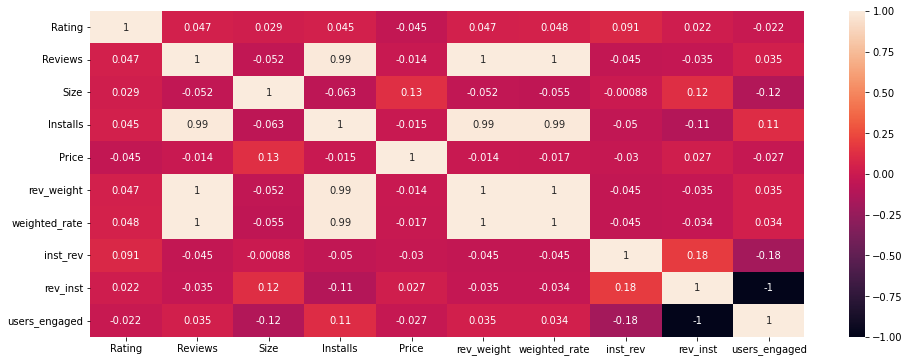

In [ ]:
#calculate the pearsons correlation coeficient of the dataset:
def compute_correlations_matrix(dataset_clean):    
    dataset_clean = dataset_clean.query("Category == 'FAMILY'")
    corr_df = dataset_clean.corr()
    #create a dictionarry from the coef table
    corelations = corr_df.to_dict(orient='dict')
    print(corelations['Installs'])
    pyplot.figure(figsize=(16, 6))
    sns.heatmap(corr_df, vmin=-1, vmax=1, annot=True)

compute_correlations_matrix(dataset_clean)

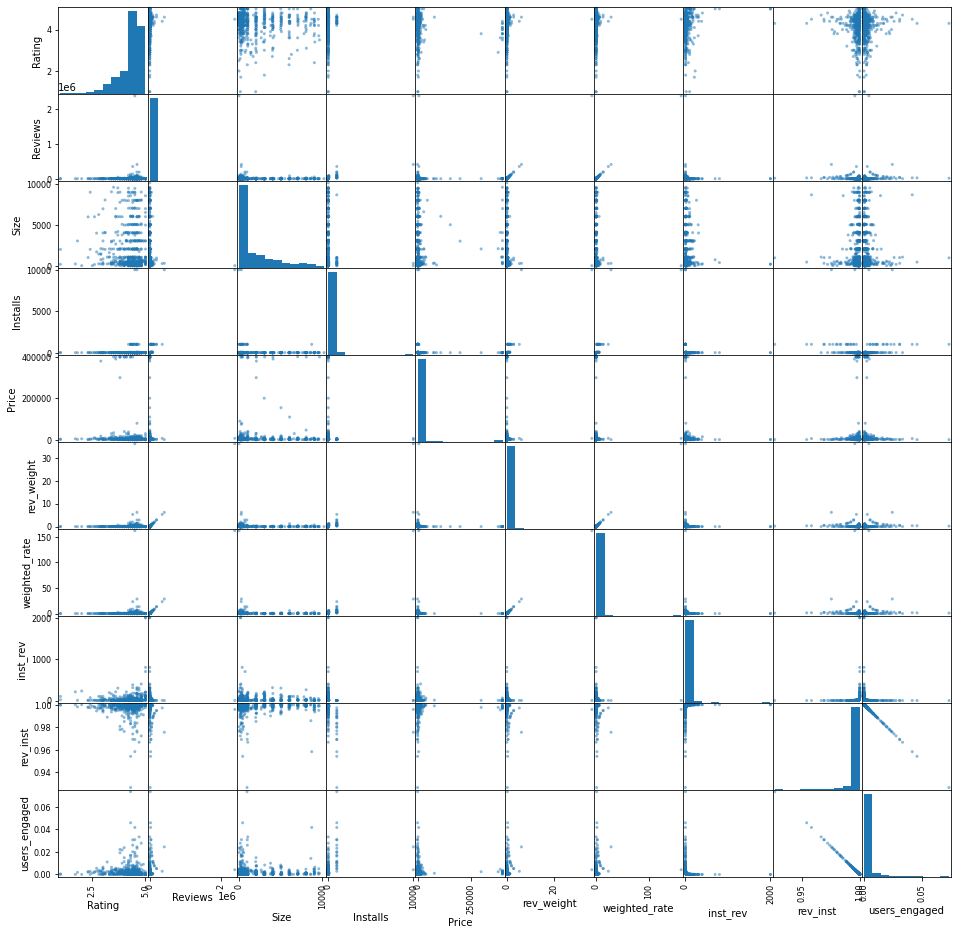

In [ ]:
def print_scatter_matrix(dataset_clean):
    pd.plotting.scatter_matrix(dataset_clean,figsize=([16,16]))

print_scatter_matrix(dataset_clean)

In [ ]:
#get unique values from the dataframe
print(dataset['Category'].unique())

['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION' '1.9']


[10000.  1000.  1000.  1000.    50.]
                             App  weighted_rate  Installs
2241                   Minecraft     162.136351   10000.0
9678           Where's My Water?      13.448696    1000.0
8860                 Bloons TD 5      13.256422    1000.0
2242  Card Wars - Adventure Time       8.448933    1000.0
6936                   Hitman GO       5.866033      50.0


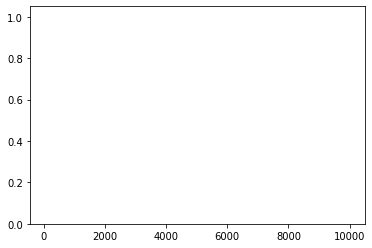

In [ ]:
#Plot with bar diagram the most populars paid apps of Family category
def popular_apps(dataset_clean):
    popular_apps = dataset_clean.query("Category == 'FAMILY'")
    #popular_apps = dataset_clean.query("Price > 0")
    popular_apps = popular_apps[['App','weighted_rate','Installs']]
    popular_apps_wght = popular_apps.sort_values(by=['weighted_rate'], ascending=False)
    popular_apps_inst = popular_apps.sort_values(by=['Installs'], ascending=False)
    popular_apps_wght_t10 = popular_apps_wght.head(5)
    popular_apps_inst_t10 = popular_apps_inst.head(5)
    x = np.array(popular_apps_wght_t10['Installs'])
    print(x)
    pyplot.bar(x, height=1)
    print(popular_apps_wght_t10)

popular_apps(dataset_clean)


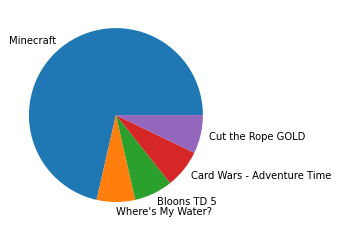

In [ ]:
#Plot with a pie diagram the most popular genres according to the number of installations from paid family

def popular_piechart(dataset_clean):
    pop_pie = dataset_clean.query("Category == 'FAMILY'")
    pop_pie = pop_pie[['App','Installs']]
    pop_pie = pop_pie.nlargest(n=5, columns=['Installs'])
    pyplot.pie(pop_pie['Installs'],labels=pop_pie['App'])

popular_piechart(dataset_clean)

In [ ]:
#Depending on each category, what are the ratio of download per app?: An array with the number of installation per category
def download_ratio(dataset_clean):
    dataset_sum = dataset_clean.groupby(['Category']).sum()
    #dataset_sum['dwnl_price'] = dataset_clean(['Price']).mean()/dataset_clean(['Installs']).mean()
    dataset_sum['downl_perc'] = (dataset_sum[['Installs']]/dataset_clean['Installs'].sum())*100
    dataset_sum['downl_perc'] = round(dataset_sum['downl_perc'],3)
    return dataset_sum.sort_values(by=['Installs'], ascending=False)

downl_ratio = download_ratio(dataset_clean)
downl_ratio

,Rating,Reviews,Size,Installs,Price,rev_weight,weighted_rate,inst_rev,rev_inst,users_engaged,inst_pric,pric_inst,value,downl_perc
Category,,,,,,,,,,,,,,
GAME,332.3,1572851,91460,18299819650,214731,23.845473,106.735173,0.753431,320040.755525,-319964.755525,2.285186,1.527182e+08,-1.527181e+08,43.849
FAMILY,659.7,3632572,301800,15564458140,2250586,55.072222,248.091646,1.524711,411867.591327,-411714.591327,NaN,2.477958e+07,-2.477940e+07,37.295
PERSONALIZATION,289.1,293153,181970,2125447940,90648,4.444396,19.420905,0.637008,134808.028005,-134744.028005,NaN,1.087204e+07,-1.087196e+07,5.093
PHOTOGRAPHY,60.2,115231,43770,1087807400,103628,1.746979,7.611406,0.149628,46994.477498,-46979.477498,4.011449,2.434686e+05,-2.434496e+05,2.607
TOOLS,262.7,171937,160120,1072344410,204925,2.606680,11.912112,0.627924,117899.220992,-117836.220992,6.188056,5.289576e+05,-5.288796e+05,2.569
COMMUNICATION,89.4,84214,73140,1035820500,62314,1.276741,5.556390,0.219190,47331.439375,-47309.439375,2.360654,5.057577e+05,-5.057307e+05,2.482
SPORTS,93.6,150635,57710,1024308150,82000,2.283727,9.933962,0.219538,32346.878438,-32324.878438,0.853301,9.221802e+05,-9.221562e+05,2.454
LIFESTYLE,76.5,47422,35330,1017901100,2346587,0.718949,3.235024,0.179490,71733.383090,-71715.383090,inf,2.029765e+05,-2.029575e+05,2.439
PRODUCTIVITY,75.7,171721,67480,141110550,229393,2.603405,12.019659,0.179352,20619.401637,-20601.401637,NaN,8.470671e+04,-8.467871e+04,0.338


In [ ]:
#What is the size of the market: Plot a pie with the number of installation per category # & %
def mark_size(dataset_clean):
    downl_ratio = dataset_clean.groupby(['Category']).sum()
    downl_ratio = downl_ratio.head(10)
    pyplot.pie(downl_ratio['App'],downl_ratio['Installs'])
    pyplot.figure(figsize=(16, 16))
    print(downl_ratio)
    
mark_size(dataset_clean)

KeyError: 'App'

In [ ]:
#What is the size of the market: Plot a bar with the mean price per category # & %



In [ ]:
#Most expensive apps per category

In [ ]:
#Any additional information you will find useful for us to take the right decision.